# Online Retail Store Sales Analysis

Business analysis of data from 2017-2019 of an online retail store hit hard by the COVID-19 Pandemic.  The key business goal for this analysis is to help mitigate the negative effects of the Covid-19 pandemic on sales. To achieve that the following questions will be answered in this analysis
**Key questions**


1.   What is the total annual sales?
2.   Annual sales per month 
3.   What are the best selling products products by Total Net Sales?
4.   What are the worst selling products products by Total Net Sales?
5.   What are the most shipped products per month?
6.   Is there a correlation between the most discounted products and their net sales?
7. Total discounts per month?
8. What are the total returns on products sold annually and per month?

**Deliverables**


*   A description of all data sources used
*   A clear statement of the business task
*   Documentation of any cleaning or manipulation of data
*   A summary of the analysis
*   Supporting visualizations and key findings








**Installing all necessary packages**

In [1]:

%load_ext rpy2.ipython

In [ ]:
%%R
install.packages("plyr")
install.packages("tidyverse")
install.packages("here")
install.packages("skimr")
install.packages("janitor")
install.packages("ggplot2")
install.packages("plotly")

**Installing the libraries**

In [ ]:
%%R
library(tidyverse)
library(lubridate)
library(plyr)
library(dplyr)
library(skimr)
library(janitor)
library(readr)
library(tidyr)
library(plotly)
library(scales) # Formatting numbers and values

**Collecting Data**

In [5]:
%%R
salesGoods <- read.csv("business.retailsales.csv")
salesAnnual <- read.csv("business.retailsales2.csv")

#Exploratory Analysis

**Check for null values**

```
# This is formatted as code
```



In [6]:
%%R
is.null(salesGoods)   
is.null(salesAnnual)

[1] FALSE


**statistical analysis of the datasets**

In [7]:
%%R
colnames(salesGoods)
glimpse(salesGoods)
str(salesGoods)
head(salesGoods)
dim(salesGoods)
nrow(salesGoods)
summary(salesGoods)

# Annual Sales

colnames(salesAnnual)
glimpse(salesAnnual)
str(salesAnnual)
head(salesAnnual)
dim(salesAnnual)
nrow(salesAnnual)
summary(salesAnnual)

Rows: 1,775
Columns: 6
$ Product.Type    <chr> "Art & Sculpture", "Basket", "Basket", "Basket", "Art …
$ Net.Quantity    <int> 34, 13, 12, 17, 47, 17, 20, 90, 10, 11, 30, 19, 15, 2,…
$ Gross.Sales     <dbl> 14935.0, 3744.0, 3825.0, 3035.0, 2696.8, 2695.0, 2310.…
$ Discounts       <dbl> -594.00, -316.80, -201.60, -63.25, -44.16, -52.50, -66…
$ Returns         <dbl> -1609, 0, -288, 0, 0, -110, -110, 0, 0, 0, 0, 0, 0, 0,…
$ Total.Net.Sales <dbl> 12732.00, 3427.20, 3335.40, 2971.75, 2652.64, 2532.50,…
'data.frame':	1775 obs. of  6 variables:
 $ Product.Type   : chr  "Art & Sculpture" "Basket" "Basket" "Basket" ...
 $ Net.Quantity   : int  34 13 12 17 47 17 20 90 10 11 ...
 $ Gross.Sales    : num  14935 3744 3825 3035 2697 ...
 $ Discounts      : num  -594 -316.8 -201.6 -63.2 -44.2 ...
 $ Returns        : num  -1609 0 -288 0 0 ...
 $ Total.Net.Sales: num  12732 3427 3335 2972 2653 ...
Rows: 36
Columns: 9
$ Month        <chr> "January", "February", "March", "April", "May", "June", "…
$ Year 

**Creating  summaries**

Sales per year

In [10]:
%%R
sales_by_Year <- salesAnnual %>% group_by(Year) %>%  #Sales per Year
  summarise(Total.Sales=sum(Total.Sales)) %>% ungroup

arrange(sales_by_Year,desc(), group_by = FALSE)

sales_by_Year <- as.data.frame(sales_by_Year) #Converting tibble to a dataframe for ease visualization and aggregation
head(sales_by_Year)



  ## There was a Year on year increment between 2017 to 2019, with Y2 seeing an increment of 0.16 from Y1 and Y3 an increment of 0.21


  Year Total.Sales
1 2017    103497.3
2 2018    123568.3
3 2019    155900.3


Total annual sales per month 

In [12]:
%%R
sales_by_month <- salesAnnual %>% group_by(Month) %>% #Sales per month
  summarise(Total.Sales=sum(Total.Sales)) %>% ungroup

arrange(sales_by_month,desc(), group_by = TRUE)

sales_by_month <- as.data.frame(sales_by_month) # Converting tibble to a dataframe for ease visualization and aggregation
print(sales_by_month)

 ## December saw the highest sales, while the lowest sales were February 


       Month Total.Sales
1      April    28146.58
2     August    27626.58
3   December    59375.46
4   February    21756.81
5    January    26847.69
6       July    26755.57
7       June    32444.36
8      March    27500.28
9        May    25379.69
10  November    55477.15
11   October    22638.20
12 September    29017.51


Best selling products

In [13]:
%%R
Top_Product_Type <- salesGoods %>% group_by(Product.Type) %>% #Top Selling items
  summarise(Total.Net.Sales=sum(Total.Net.Sales)) %>% ungroup
head(arrange(Top_Product_Type,desc(Total.Net.Sales)), n = 20)

Top_Product_Type <- as.data.frame(Top_Product_Type) ##Converting tibble to a dataframe for ease visualization and aggregation

top_best <- head(arrange(Top_Product_Type,desc(Total.Net.Sales)), n = 9) #Ranking the top 9 best selling products by Total Net Sales
print(top_best)

## Baskets were the highest selling products


     Product.Type Total.Net.Sales
1          Basket       134791.39
2 Art & Sculpture        84480.85
3         Jewelry        29572.95
4      Home Decor        25699.99
5         Kitchen        15336.82
6       Christmas        14460.81
7       Soapstone         4629.09
8     Accessories         3785.38
9            Kids         3721.34


 Most shipped products per month

In [15]:
%%R
Shipping_per_month <- salesAnnual %>% group_by(Month) %>%
  summarise(Shipping=sum(Shipping)) %>% ungroup
Shipping_per_month <- head(arrange(Shipping_per_month,(Shipping)), n = 19)
Shipping_per_month <- as.data.frame(Shipping_per_month) # Converting tibble to a dataframe for ease visualization and aggregation
print(Shipping_per_month)

 ## December and November have the 1st and 2nd highest number of shippments. That correlates with the figures of the best selling products. 


       Month Shipping
1   February  2923.21
2    January  3582.26
3    October  3589.12
4      April  3798.31
5        May  3869.61
6     August  3972.24
7      March  4049.45
8       July  4065.79
9  September  4109.30
10      June  4685.61
11  November  8616.90
12  December  9596.30


Worst selling products

In [16]:
%%R 
top_worst <- top_n(Top_Product_Type, -9)
top_worst <- head(arrange(top_worst,(Total.Net.Sales)), n = 9)
na.omit(top_worst)
top_worst <- as.data.frame(top_worst) ##Converting tibble to a dataframe for ease visualization and aggregation
print(top_worst)

 ## Gift baskets are the worst selling products 


Selecting by Total.Net.Sales
      Product.Type Total.Net.Sales
1     Gift Baskets           19.50
2           Easter           34.20
3                           560.50
4         Textiles         1679.10
5        Furniture         1864.96
6    One-of-a-Kind         2108.01
7 Fair Trade Gifts         2204.67
8            Music         2418.90
9        Skin Care         2571.80


Checking to see if there is a correlation between the most discounted products and their net sales

In [17]:
%%R
Discounts <- salesGoods %>% group_by(Product.Type) %>%
  summarise(Discounts=sum(Discounts)) %>% ungroup
Discounts <- head(arrange(Discounts,(Discounts)), n = 19)
Discounts <- as.data.frame(Discounts) #Converting tibble to a dataframe for ease visualization and aggregation
print(Discounts)

 ## There is correlation between the best selling items and the top discounted items. Basket the product with the higest net sales is also the most discounted product


       Product.Type Discounts
1            Basket  -4584.42
2   Art & Sculpture  -2955.82
3        Home Decor   -991.21
4           Jewelry   -965.85
5           Kitchen   -431.11
6         Christmas   -345.19
7         Furniture   -169.04
8              Kids   -116.66
9          Textiles   -112.90
10      Accessories   -107.02
11        Soapstone    -96.91
12     Recycled Art    -88.64
13            Music    -82.19
14    One-of-a-Kind    -71.99
15 Fair Trade Gifts    -53.33
16        Skin Care    -37.70
17           Easter     -3.80
18                       0.00
19     Gift Baskets      0.00


Discounts per month 

In [19]:
%%R
Discounts_per_month <- salesAnnual %>% group_by(Month) %>%
  summarise(Discounts=sum(Discounts)) %>% ungroup
Discounts_per_month <- head(arrange(Discounts_per_month,(Discounts)), n = 12)
Discounts_per_month <- as.data.frame(Discounts_per_month) #Converting tibble to a dataframe for ease visualization and aggregation
print(Discounts_per_month)


 ## December had the highest discount at -2790.56, while February had the least discounts at -554.75

       Month Discounts
1   December  -2790.56
2   November  -1322.59
3        May   -867.90
4      March   -838.87
5      April   -799.08
6       June   -755.87
7       July   -736.44
8  September   -692.74
9    October   -645.37
10   January   -608.47
11    August   -601.14
12  February   -554.75


Checking the returns on products sold

In [23]:
%%R
Returns <- salesGoods %>% group_by(Product.Type) %>%
  summarise(Returns=sum(Returns)) %>% ungroup
Returns <- head(arrange(Returns,(Returns)), n = 19)
Returns <- as.data.frame(Returns) # Converting tibble to a dataframe for ease visualization and aggregation
print(Returns)


#Returns per month 

#Returns_per_month <- salesAnnual %>% group_by(Month) %%
  #summarise(Returns=sum(Returns)) %>% ungroup
#Returns_per_month <- head(arrange(Returns_per_month,(Returns)), n = 12)
#Returns_per_month <- as.data.frame(Returns_per_month) # Converting tibble to a dataframe for ease visualization and aggregation
#print(Returns_per_month) 
 ## December had the highest returns (negative returns), while April had the lowest.

       Product.Type  Returns
1            Basket -4439.69
2   Art & Sculpture -2879.93
3         Christmas  -670.00
4           Jewelry  -509.20
5        Home Decor  -423.35
6           Kitchen  -328.07
7             Music  -142.41
8          Textiles   -97.00
9         Soapstone   -69.50
10                      0.00
11      Accessories     0.00
12           Easter     0.00
13 Fair Trade Gifts     0.00
14        Furniture     0.00
15     Gift Baskets     0.00
16             Kids     0.00
17    One-of-a-Kind     0.00
18     Recycled Art     0.00
19        Skin Care     0.00


# Visualizations 

**Visualizing summary data**

Sales per Year

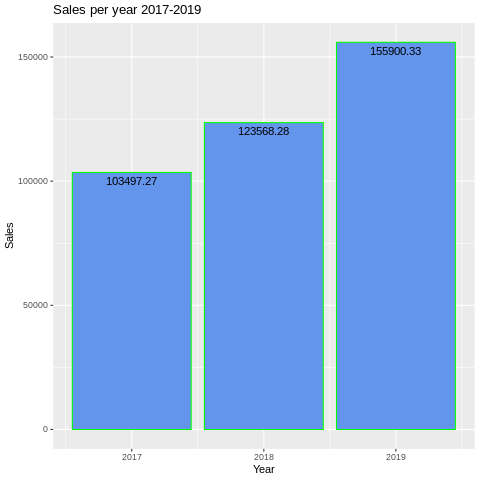

In [26]:
%%R 
ggplot(sales_by_Year,
       aes(x = Year, 
           y = Total.Sales))+
  geom_bar(stat="identity",
           fill = "cornflowerblue",
           color = "green") +
  geom_text(aes(label=Total.Sales), vjust=1.6, color="black", size=4.0)+
  labs(x = "Year",y = "Sales", title  = "Sales per year 2017-2019")


Sales per Month

In [31]:
%%R
sales_plot_month <- sales_by_month%>% 
  ggplot()+
  geom_line(aes(x = Month, y = Total.Sales, group = 1))+
  scale_x_discrete(limits = month.name) + # sorting the month column into a monthly order. 
  scale_y_continuous(labels = function(x) {
    scales::comma(x, big.mark = ".", decimal.mark = ",")
  })+
  labs(x = "Month",y = "Sales", title  = "Sales per month")
ggplotly(sales_plot_month)


Best selling products

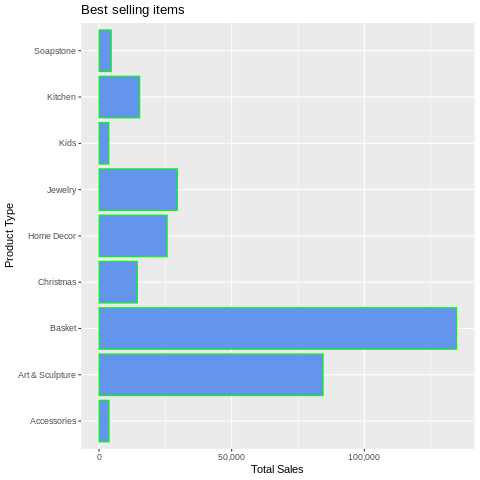

In [32]:
%%R 
ggplot(top_best,
       aes(x =  Product.Type , 
           y = Total.Net.Sales)) +
  geom_bar(stat="identity",
           fill = "cornflowerblue",
           color = "green") +
  scale_y_continuous(labels = scales::comma)+
  coord_flip()+
  labs(x = "Product Type",y = "Total Sales", title  = "Best selling items")


Worst selling products

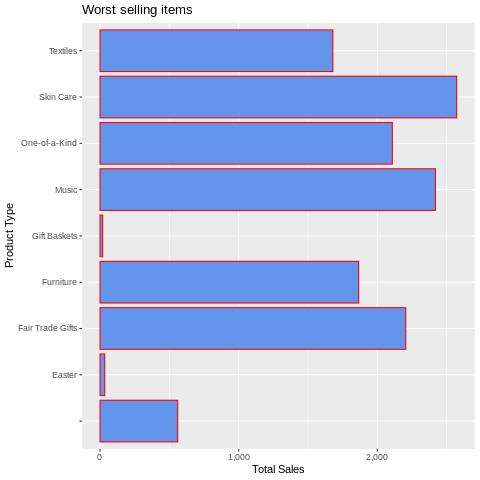

In [35]:
%%R
ggplot(top_worst,
       aes(x =  Product.Type , 
           y = Total.Net.Sales)) +
  geom_bar(stat="identity",
           fill = "cornflowerblue",
           color = "red") +
  coord_flip()+
  scale_y_continuous(labels = scales::comma)+
  labs(x = "Product Type",y = "Total Sales", title  = "Worst selling items")

Discounts 

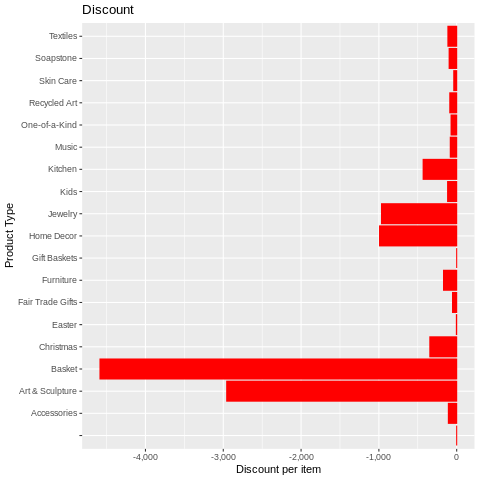

In [36]:
%%R
ggplot(Discounts,
       aes(x =  Product.Type , 
           y = Discounts)) +
  geom_bar(stat="identity",
           fill = "red",
           color = "red") +
  scale_y_continuous(labels = scales::comma)+
  coord_flip()+
  labs(x = "Product Type",y = "Discount per item", title  = "Discount")

Discounts per month

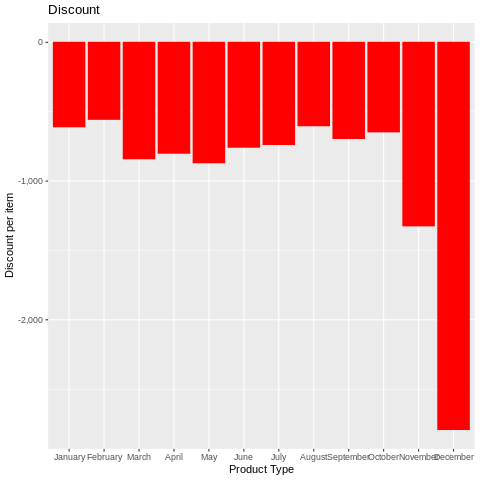

In [41]:
%%R
ggplot(Discounts_per_month,
       aes(x =  Month, 
           y = Discounts)) +
  geom_bar(stat="identity",
           fill = "red",
           color = "red") +
  scale_x_discrete(limits = month.name)+
  scale_y_continuous(labels = scales::comma)+
  labs(x = "Product Type",y = "Discount per item", title  = "Discount")

Discounts per month

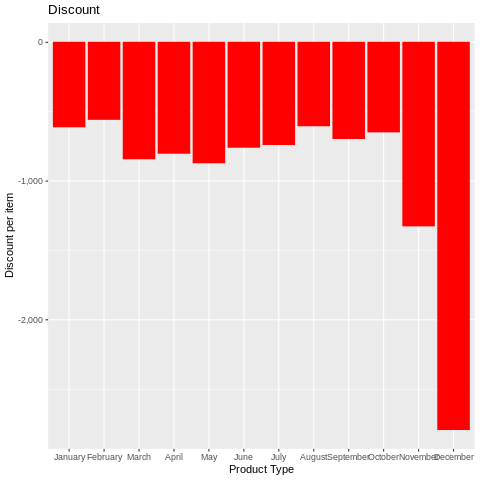

In [40]:
%%R
ggplot(Discounts_per_month,
       aes(x =  Month, 
           y = Discounts)) +
  geom_bar(stat="identity",
           fill = "red",
           color = "red") +
  scale_x_discrete(limits = month.name)+
  scale_y_continuous(labels = scales::comma)+
  labs(x = "Month",y = "Discount per item", title  = "Discount per month")

Returns per product 

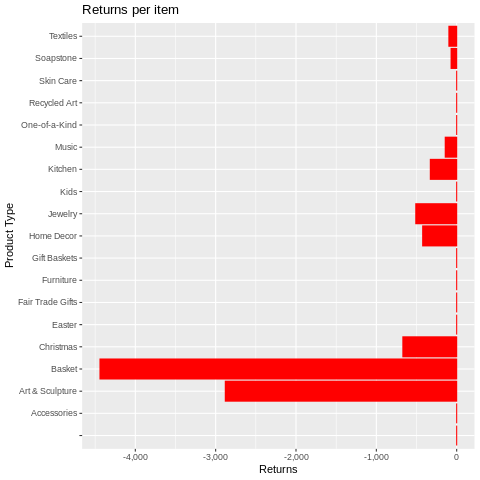

In [42]:
%%R 
ggplot(Returns,
       aes(x = Product.Type, 
           y = Returns)) +
  geom_bar(stat="identity",
           fill = "red",
           color = "red")+
  scale_y_continuous(labels = scales::comma)+
  coord_flip()+
  labs(x = "Product Type",y = "Returns", title = "Returns per item")


Returns per month 

In [1]:
#%%R 
#ggplot(Returns_per_month,
       #aes(x =  Month , 
           #y = Returns)) +
  #geom_bar(stat="identity",
           #fill = "cornflowerblue",
           #color = "red") +
  #scale_x_discrete(limits = month.name)+
  #scale_y_continuous(labels = scales::comma)+
  #labs(x = "Month",y = "Returns", title = "Returns per month")
 

# Key Takeways

*   There was a Year on year increment between 2017 to 2019, with Y2 seeing an increment of 0.16 from Y1 and Y3 an increment of 0.21

*  December saw the highest sales, while the lowest sales were February 
*  Baskets were the highest selling products
*  December and November have the 1st and 2nd highest number of shippments. That correlates with the figures of the best selling products.  
*  Gift baskets are the worst selling product. 
*  There is correlation between the best selling products and the top discounted items. Basket the product with the higest net sales is also the most discounted product 
* December had the highest discount at -2790.56, while February had the least discounts at -554.75.
* December had the highest returns (negative returns), while April had the lowest.
* Our analysis point to a cashflow issue as the business makes most of its sales between 2 month of the year, November and December. 



# Recommendations

1.   Develop a loyalty program that offers monthly discounts to even out the discounts through the year. As there is a correlation between the
2. Use the data generated from the customer loyalty program to fine tune future analysis and a possible ML model()
3. Include a product rating system on the store's website, use the data from the rating system to guide a coupon recommendation system based on individual customer profiles and customer segments. 




